In [1]:
import os
from PIL import Image
from pathlib import Path
from utils.download import download_video, get_transcript_vtt
from utils.metadata import generate_metadata

In [2]:
vid1_url = "https://www.youtube.com/watch?v=7Hcg-rLYwdM"

# download Youtube video to ./shared_data/videos/video1
vid1_dir = "./data/videos/video1"
vid1_filepath = download_video(vid1_url, vid1_dir)

# download Youtube video's subtitle to ./shared_data/videos/video1
vid1_transcript_filepath = get_transcript_vtt(vid1_url, vid1_dir)

Getting video information for https://www.youtube.com/watch?v=7Hcg-rLYwdM


In [3]:
print(vid1_filepath)
print(vid1_transcript_filepath)

./data/videos/video1/Welcome back to Planet Earth.mp4
./data/videos/video1/captions.vtt


In [4]:
vid2_url = "https://www.youtube.com/watch?v=YoeHPP6pCAE"

# download Youtube video to ./shared_data/videos/video1
vid2_dir = "./data/videos/video2"
vid2_filepath = download_video(vid2_url, vid2_dir)

# download Youtube video's subtitle to ./shared_data/videos/video1
vid2_transcript_filepath = get_transcript_vtt(vid2_url, vid2_dir)

Getting video information for https://www.youtube.com/watch?v=YoeHPP6pCAE


In [5]:
print(vid2_filepath)
print(vid2_transcript_filepath)

./data/videos/video2/106th Anniversary of the Battle of Belleau Wood.mp4
./data/videos/video2/captions.vtt


In [6]:
extracted_frames_path = os.path.join(vid1_dir, 'extracted_frame')
metadatas_path = vid1_dir

# create these output folders if not existing
Path(extracted_frames_path).mkdir(parents=True, exist_ok=True)
Path(metadatas_path).mkdir(parents=True, exist_ok=True)

# call the function to extract frames and metadatas
metadatas_1 = generate_metadata(
                vid1_filepath, 
                vid1_transcript_filepath,
                extracted_frames_path,
                metadatas_path,
            )
metadatas_1[0]

{'extracted_frame_path': './data/videos/video1/extracted_frame/frame_0.jpg',
 'transcript': "As I look back on the the mission that we've had here",
 'video_segment_id': 0,
 'video_path': './data/videos/video1/Welcome back to Planet Earth.mp4',
 'mid_time_ms': 5249.5}

In [7]:
extracted_frames_path = os.path.join(vid2_dir, 'extracted_frame')
metadatas_path = vid2_dir

# create these output folders if not existing
Path(extracted_frames_path).mkdir(parents=True, exist_ok=True)
Path(metadatas_path).mkdir(parents=True, exist_ok=True)

# call the function to extract frames and metadatas
metadatas_2 = generate_metadata(
                vid2_filepath, 
                vid2_transcript_filepath,
                extracted_frames_path,
                metadatas_path,
            )
metadatas_2[0]

{'extracted_frame_path': './data/videos/video2/extracted_frame/frame_0.jpg',
 'transcript': '[Music]',
 'video_segment_id': 0,
 'video_path': './data/videos/video2/106th Anniversary of the Battle of Belleau Wood.mp4',
 'mid_time_ms': 10925.0}

In [8]:
from embeddings.bridge_tower import get_bridgetower_combined_embeddings, BridgeTowerEmbeddings

/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:

image_path = '/Users/bhavikardeshna/PlayGround/LLM/VidRag/data/videos/video1/extracted_frame/frame_0.jpg'
text = 'This is a sample caption for the image.'
combined_embeds = get_bridgetower_combined_embeddings(image_path, text)

/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BridgeTowerForContrastiveLearning were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-itc and are newly initialized: ['logit_scale']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
embedder = BridgeTowerEmbeddings()

In [11]:
from vectors.multimodal_lancedb import MultimodalLanceDB
from utils.utils import load_json_file


In [18]:

vid1_metadata_path = './data/videos/video1/metadatas.json'
vid1_metadata = load_json_file(vid1_metadata_path)

vid1_trans = [vid['transcript'] for vid in vid1_metadata]
vid1_img_path = [vid['extracted_frame_path'] for vid in vid1_metadata]


vid2_metadata_path = './data/videos/video2/metadatas.json'
vid2_metadata = load_json_file(vid2_metadata_path)

vid2_trans = [vid['transcript'] for vid in vid2_metadata]
vid2_img_path = [vid['extracted_frame_path'] for vid in vid2_metadata]



In [19]:
# _ = embedder.embed_image_text_pairs(vid1_img_path,vid1_trans)

In [20]:
import lancedb

In [21]:
LANCEDB_HOST_FILE = "./data/.lancedb"
# declare table name
TBL_NAME = "test_tbl"
# initialize vectorstore
db = lancedb.connect(LANCEDB_HOST_FILE)

In [24]:
len(vid1_trans+vid1_trans), len(vid1_img_path+vid2_img_path)

(26, 38)

In [25]:
_ = MultimodalLanceDB.from_text_image_pairs(
    texts=vid1_trans+vid2_trans,
    image_paths=vid1_img_path+vid2_img_path,
    embedding=embedder,
    metadatas=vid1_metadata+vid2_metadata,
    connection=db,
    table_name=TBL_NAME,
    mode="overwrite", 
)

# _ = MultimodalLanceDB.from_text_image_pairs(
#     texts=vid2_trans,
#     image_paths=vid2_img_path,
#     embedding=embedder,
#     metadatas=vid2_metadata,
#     connection=db,
#     table_name=TBL_NAME,
#     mode="overwrite", 
# )

  0%|          | 0/64 [00:00<?, ?it/s]/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BridgeTowerForContrastiveLearning were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-itc and are newly initialized: ['logit_scale']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  2%|▏         | 1/64 [00:09<09:52,  9.40s/it]Some weights of BridgeTowerForContrastiveLearning were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-itc and are newly initialized: ['logit_scale']
You shou

LanceTable(connection=LanceDBConnection(/Users/bhavikardeshna/PlayGround/LLM/VidRag/data/.lancedb), name="test_tbl")


In [26]:
# open a connection to table TBL_NAME
tbl = db.open_table(TBL_NAME)

print(f"There are {tbl.to_pandas().shape[0]} rows in the table")
# display the first 3 rows of the table
tbl.to_pandas()[['text', 'image_path']].head(50)


There are 64 rows in the table


,text,image_path
0,As I look back on the the mission that we've h...,./data/videos/video1/extracted_frame/frame_0.jpg
1,"on the International Space Station, I'm proud ...",./data/videos/video1/extracted_frame/frame_1.jpg
2,the science activities that happened over the ...,./data/videos/video1/extracted_frame/frame_2.jpg
3,two months.,./data/videos/video1/extracted_frame/frame_3.jpg
4,The view is always amazing,./data/videos/video1/extracted_frame/frame_4.jpg
5,I didn't think I would do another,./data/videos/video1/extracted_frame/frame_5.jpg
6,spacewalk and to now have the chance to have done,./data/videos/video1/extracted_frame/frame_6.jpg
7,four more was just icing on the cake for a,./data/videos/video1/extracted_frame/frame_7.jpg
8,a wonderful mission.,./data/videos/video1/extracted_frame/frame_8.jpg
9,Does the 10th one feel like the first one?,./data/videos/video1/extracted_frame/frame_9.jpg


In [27]:
# Creating a LanceDB vector store 
vectorstore = MultimodalLanceDB(
    uri=LANCEDB_HOST_FILE, 
    embedding=embedder, 
    table_name=TBL_NAME)

# creating a retriever for the vector store
# search_type="similarity" 
#  declares that the type of search that the Retriever should perform 
#  is similarity search
# search_kwargs={"k": 1} means returning top-1 most similar document
retriever = vectorstore.as_retriever(
    search_type='similarity', 
    search_kwargs={"k": 5}
)

In [28]:
from utils.utils import display_retrieved_results

/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BridgeTowerForContrastiveLearning were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-itc and are newly initialized: ['logit_scale']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


There is/are 5 retrieved result(s)

The caption of the 1-th retrieved result is:
"a wonderful mission."



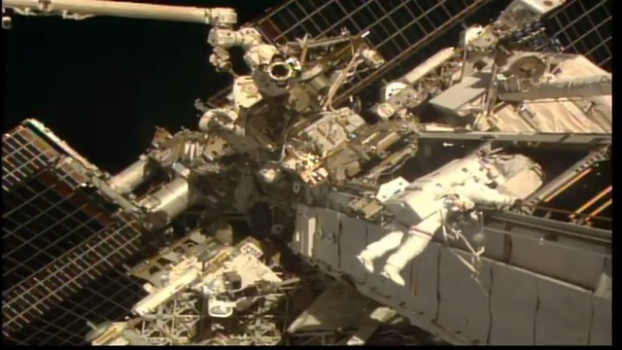

------------------------------------------------------------
The caption of the 2-th retrieved result is:
"As I look back on the the mission that we've had here"



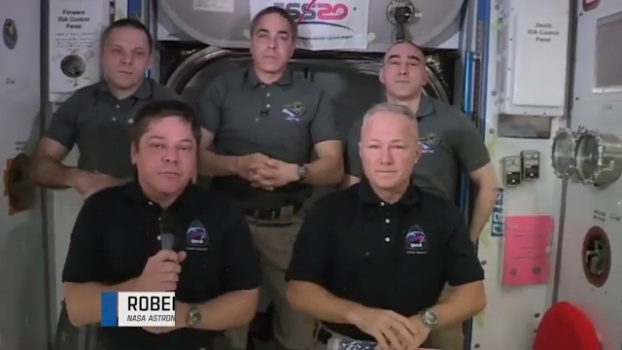

------------------------------------------------------------
The caption of the 3-th retrieved result is:
"our call to duty to Country and to"



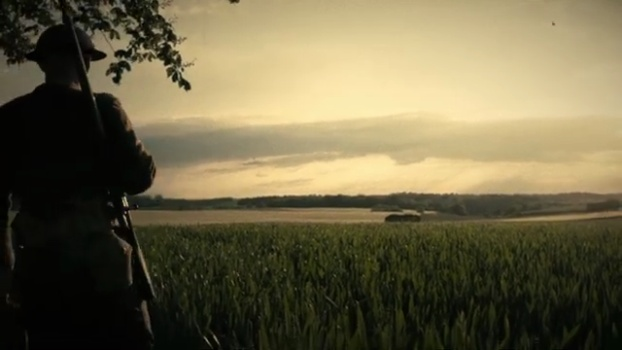

------------------------------------------------------------
The caption of the 4-th retrieved result is:
"than 100 Years Ago by Marines answering"



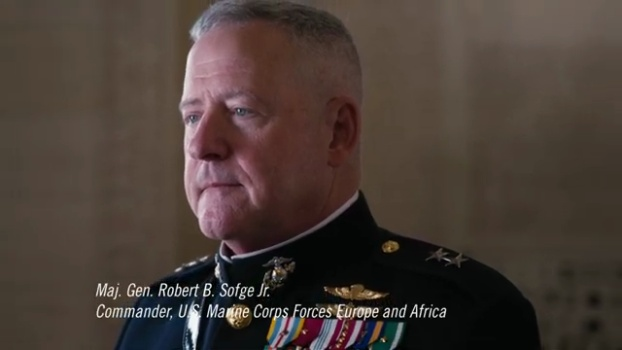

------------------------------------------------------------
The caption of the 5-th retrieved result is:
"our fallen will never see with a sense"



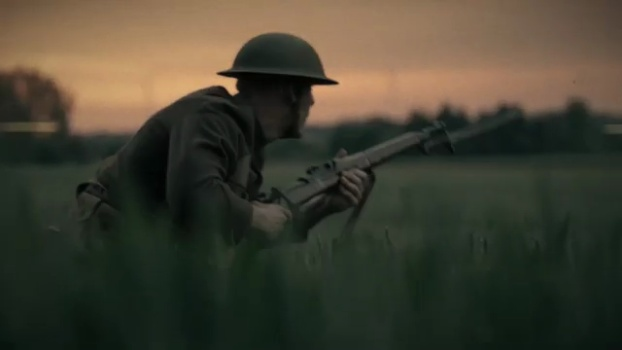

------------------------------------------------------------


In [29]:
query1 = "a courage and wonderful mission"
results = retriever.invoke(query1)
display_retrieved_results(results)

/Users/bhavikardeshna/miniconda3/envs/video-rag/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BridgeTowerForContrastiveLearning were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-itc and are newly initialized: ['logit_scale']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Transcript:
on the International Space Station, I'm proud to have been a part of much of

Path to extracted frame: ./data/videos/video1/extracted_frame/frame_1.jpg
Path to video: ./data/videos/video1/Welcome back to Planet Earth.mp4
Timestamp in ms when the frame was extracted: 8719.0


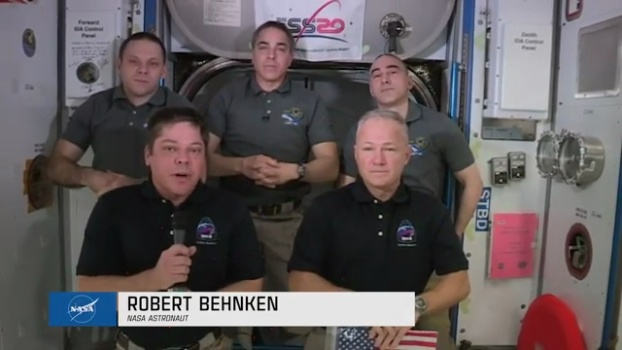

In [30]:
text = "What do the astronauts feel about their work?"
retrieved_video_segments = retriever.invoke(text)
# get the first retrieved video segment
retrieved_video_segment = retrieved_video_segments[0]

retrieved_metadata = retrieved_video_segment.metadata['metadata']

# get the extracted frame
frame_path = retrieved_metadata['extracted_frame_path']
# get the corresponding transcript
transcript = retrieved_metadata['transcript']
# get the path to video where the frame was extracted
video_path = retrieved_metadata['video_path']
# get the time stamp when the frame was extracted
timestamp = retrieved_metadata['mid_time_ms']

# display
print(f"Transcript:\n{transcript}\n")
print(f"Path to extracted frame: {frame_path}")
print(f"Path to video: {video_path}")
print(f"Timestamp in ms when the frame was extracted: {timestamp}")
display(Image.open(frame_path))